<a href="https://colab.research.google.com/github/sjbriggsdev/cd_finalproject/blob/master/Final_Project_Predict_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - Predict Heart Disease
- Steven Briggs
- 03/29/22

## IMPORTS

In [5]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import set_config
set_config(display='diagram')
# Scoring imports
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix, recall_score, precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Clustering imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df=pd.read_csv('/content/drive/MyDrive/DATA/chddata.csv')
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


## DATA PREP AND CLEANUP

In [7]:
# using this command to compare to Data Dictionary dtypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


---

First attempt to convert Na_to_K Column failed because of a string so I replaced that string with a number and tried again.

---

In [8]:
# Checking for null values shows Age and BP Columns with missing
df.isna().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [9]:
# Checking for duplicated rows, found none.
df[df.duplicated()]

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd


---

The function below looks for unique values in each column

---

In [10]:
for col in df:
  isunique = df[col].unique()
  isunique.sort()
  print(f'- {col}:')
  print(isunique)

- sbp:
[101 102 103 106 108 109 110 112 114 116 117 118 120 121 122 123 124 126
 127 128 129 130 132 134 136 137 138 140 142 143 144 145 146 148 150 152
 153 154 156 158 160 161 162 164 166 168 170 174 176 178 180 182 188 190
 194 198 200 206 208 214 216 218]
- tobacco:
[0.000e+00 1.000e-02 2.000e-02 3.000e-02 4.000e-02 5.000e-02 6.000e-02
 7.000e-02 8.000e-02 9.000e-02 1.000e-01 1.200e-01 1.600e-01 1.800e-01
 2.100e-01 2.800e-01 3.000e-01 3.100e-01 4.000e-01 4.100e-01 4.200e-01
 4.500e-01 4.600e-01 4.800e-01 5.000e-01 5.200e-01 5.400e-01 5.600e-01
 5.700e-01 6.000e-01 6.100e-01 6.400e-01 7.000e-01 7.200e-01 7.300e-01
 7.500e-01 7.600e-01 8.000e-01 8.100e-01 8.700e-01 9.000e-01 9.200e-01
 9.500e-01 9.600e-01 1.000e+00 1.020e+00 1.030e+00 1.040e+00 1.050e+00
 1.080e+00 1.100e+00 1.150e+00 1.160e+00 1.200e+00 1.220e+00 1.250e+00
 1.320e+00 1.350e+00 1.360e+00 1.400e+00 1.440e+00 1.500e+00 1.520e+00
 1.530e+00 1.600e+00 1.610e+00 1.620e+00 1.680e+00 1.700e+00 1.720e+00
 1.750e+00 1.800e+0

---

Looking at the object columns, I found famhist has two entries "Absent" or "Present" so I set them to numeric.

---

In [11]:
df['famhist'].replace({"Absent": 0,"Present": 1}, inplace=True)

In [12]:
# Checking the DF after changes
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [13]:
# Checking the object types after changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    int64  
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 36.2 KB


In [14]:
df.describe()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


## VISUALIZATION

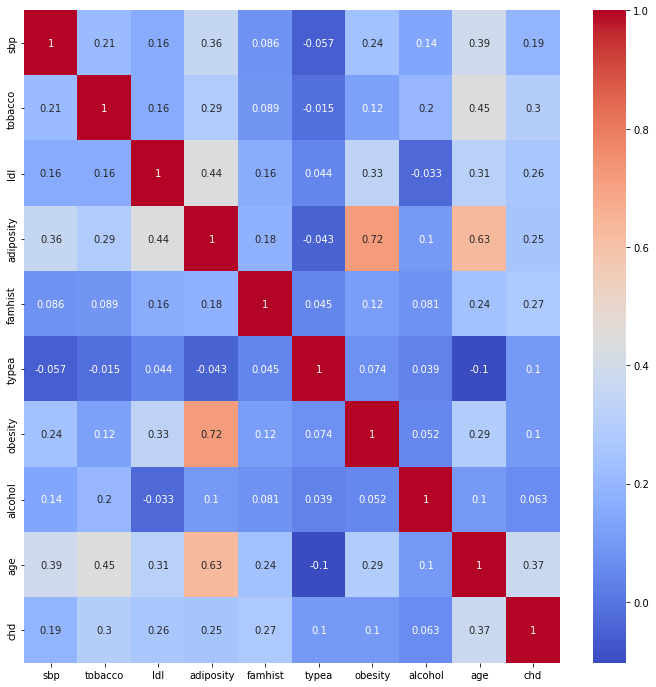

In [ ]:
# plot a heatmap of all numeric data with annotation
corr = df.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap='coolwarm')

---

There appear to be strong correlations between Age, Obesity, and Adiposity (fatty tissue in the body).  Not as high but decent correlations between tobacco use and Age, as well as Adiposity and LDL (cholesterol).

---


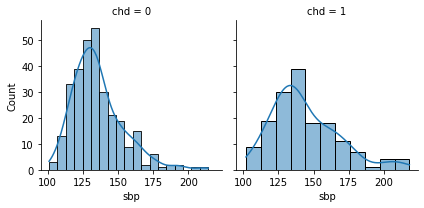

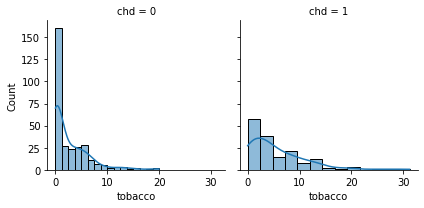

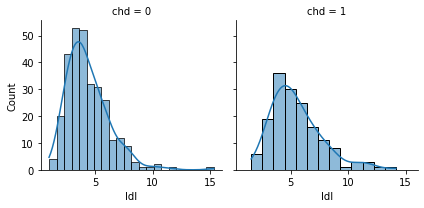

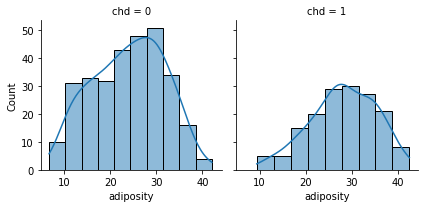

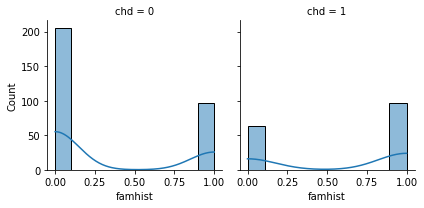

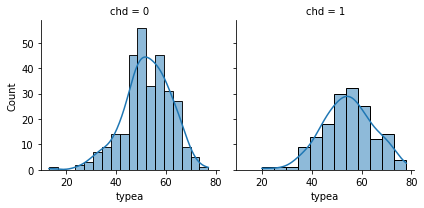

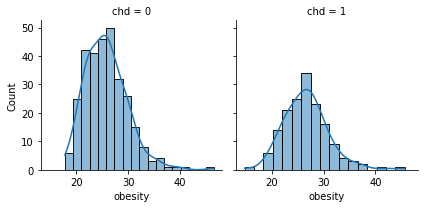

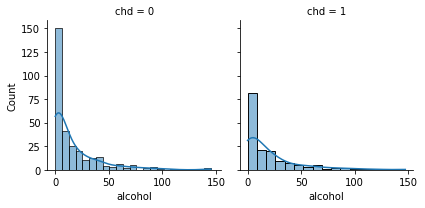

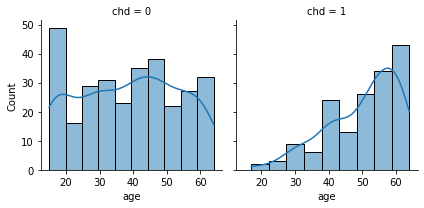

In [ ]:
# I found a visualization called FacetGrid that allows me to compare
# a one feature against the others in a meaningful way

fig = sns.FacetGrid(df, col="chd")
fig.map_dataframe(sns.histplot, x="sbp", kde=True)
  
fig = sns.FacetGrid(df, col="chd")
fig.map_dataframe(sns.histplot, x="tobacco", kde=True)

fig = sns.FacetGrid(df, col="chd")
fig.map_dataframe(sns.histplot, x="ldl", kde=True)
  
fig = sns.FacetGrid(df, col="chd")
fig.map_dataframe(sns.histplot, x="adiposity", kde=True)

fig = sns.FacetGrid(df, col="chd")
fig.map_dataframe(sns.histplot, x="famhist", kde=True)
  
fig = sns.FacetGrid(df, col="chd")
fig.map_dataframe(sns.histplot, x="typea", kde=True)

fig = sns.FacetGrid(df, col="chd")
fig.map_dataframe(sns.histplot, x="obesity", kde=True)
  
fig = sns.FacetGrid(df, col="chd")
fig.map_dataframe(sns.histplot, x="alcohol", kde=True)

fig = sns.FacetGrid(df, col="chd")
fig.map_dataframe(sns.histplot, x="age", kde=True)
  

---

The chart above is a histogram showing the diagnosis of Coronary Heart Disease (CHD 0 is negative, CHD 1 is positive) against each feature in the dataframe
which allows me to directly compare each feature.

---

In [ ]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,cluster
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1,3
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1,3
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1,1


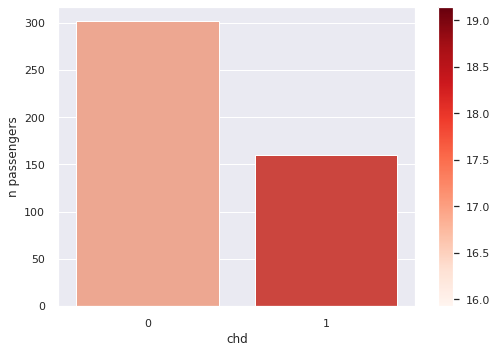

In [116]:
#chd = sns.load_dataset("df")
g = df.groupby('chd')
survival_rates = g['alcohol'].mean()
n = g.size()

plot = plt.scatter(n.index, n, c=survival_rates, cmap='Reds')
plt.clf()
plt.colorbar(plot)
ax = sns.barplot(x=n.index, y=n, hue=survival_rates, palette='Reds', dodge=False)
ax.set_ylabel('n passengers')
ax.legend_.remove()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


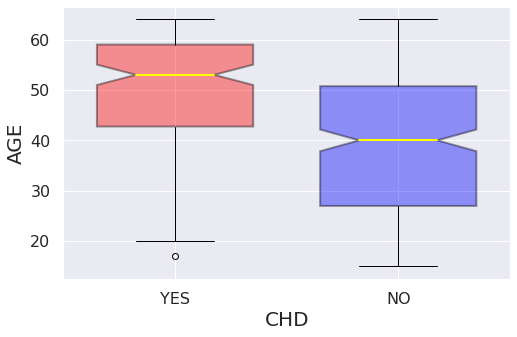

In [48]:
chd_positive = df.loc[df['chd']==1,'age']
chd_negative = df.loc[df['chd']==0,'age']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([chd_positive,chd_negative],
           notch = True,
           labels=['YES', 'NO'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('CHD', fontsize = 20);
plt.ylabel('AGE', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

In [75]:
chd_positive = df.loc[df['chd']==1,'age'].sort_values(ascending=True)
chd_negative = df.loc[df['chd']==0,'age'].sort_values(ascending=True)
diagnosis = df.groupby(['chd'])['sbp'].count()


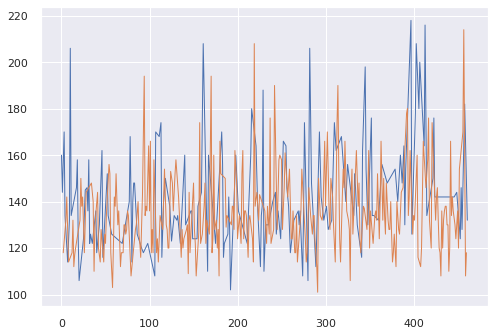

In [89]:
plt.plot(df.loc[df['chd']==1,'sbp'],linewidth=1.0)
plt.plot(df.loc[df['chd']==0,'sbp'],linewidth=1.0)
plt.show()

## MODELING AND PROCESSING

In [ ]:
X = df.drop(columns = 'chd')
y = df['chd']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
scaled_df


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1.058564,1.823073,0.478412,-0.295503,1.185854,-0.418470,-0.176786,3.277738,0.629336,1.373863
1,0.277089,-0.790237,-0.159680,0.412140,-0.843274,0.193344,0.671373,-0.612745,1.383115,1.373863
2,-0.992806,-0.774980,-0.609245,0.884332,1.185854,-0.112563,0.735519,-0.541183,0.218184,-0.727875
3,1.546985,0.842264,0.807126,1.624141,1.185854,-0.214532,1.412621,0.295062,1.040488,1.373863
4,-0.211332,2.171805,-0.599577,0.305351,1.185854,0.703189,-0.012856,1.647775,0.423760,1.373863
...,...,...,...,...,...,...,...,...,...,...
457,3.696039,-0.705234,0.599263,0.812281,-0.843274,1.111065,0.571590,-0.696983,1.040488,-0.727875
458,2.133091,0.123004,-0.159680,0.861173,-0.843274,-0.112563,0.609602,0.068519,0.629336,1.373863
459,-1.481228,-0.138545,-1.522877,-1.309364,-0.843274,-1.336191,-1.414575,0.392385,0.834912,-0.727875
460,-0.992806,0.384553,3.320823,0.692625,-0.843274,1.111065,0.310252,0.283203,-0.192969,-0.727875


In [ ]:
# This will identify all of the quantitative features (columns)
quant_feat = make_column_selector(dtype_include = 'number')

# Create Scaler
scaler = StandardScaler()

# Create a mean imputer
mean_imputer = SimpleImputer(strategy='mean')

In [ ]:
# Create the num processing pipeline and column transformer
num_processor = make_pipeline(mean_imputer, scaler)
num_tuple = (num_processor, quant_feat)
column_transformer = make_column_transformer(num_tuple, remainder='passthrough')

## Logistic Regression  -- CHOICE FOR FINAL PRODUCTION MODEL 

In [ ]:
# Logistic Regression with default paramters
lr = LogisticRegression()

# Create pipeline
lr_pipe = make_pipeline(column_transformer, lr)

# Fit model
lr_pipe.fit(X_train, y_train)

# Evaluate default model and print scores
lr_train_preds = lr_pipe.predict(X_train)
lr_test_preds = lr_pipe.predict(X_test)

print('Logistic regression Train score:', accuracy_score(y_train, lr_train_preds))
print('Logistic regression Test score:', accuracy_score(y_test, lr_test_preds))

Logistic regression Train score: 0.7312138728323699
Logistic regression Test score: 0.75


In [ ]:
# Set ranges of parameters to find best
params = {'logisticregression__penalty':['l2','l1'], 
          'logisticregression__C':[.001, .01, .1, 1], 
          'logisticregression__class_weight':[None, 'balanced'],
          'logisticregression__solver': ['liblinear']}

In [ ]:
# Use Gridsearch to finde best parameters
lr_grid = GridSearchCV(lr_pipe, params)
lr_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b4d8bd910>)])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1],
                         'logisticregression__class_weight': [None, 'balanced'],
                         'logisticregression__penalty': ['l2', 'l1'],
                         'logisticregression__solver': ['liblinear']})

In [ ]:
# View best parameters
lr_grid.best_params_

{'logisticregression__C': 0.1,
 'logisticregression__class_weight': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [ ]:
# Create variable with the best parameters
best_lr = lr_grid.best_estimator_

In [ ]:
# Run a classification report on both train and test datasets for the best model

lr_train_preds = best_lr.predict(X_train)
lr_test_preds = best_lr.predict(X_test)

print('Logistic Regression Best Model Training Metrics')
print(classification_report(y_train, lr_train_preds))
print('\n Logistion Regression Best Model Testing Metrics')
print(classification_report(y_test, lr_test_preds))

Logistic Regression Best Model Training Metrics
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       227
           1       0.65      0.53      0.58       119

    accuracy                           0.74       346
   macro avg       0.71      0.69      0.70       346
weighted avg       0.73      0.74      0.73       346


 Logistion Regression Best Model Testing Metrics
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        75
           1       0.63      0.59      0.61        41

    accuracy                           0.73       116
   macro avg       0.71      0.70      0.70       116
weighted avg       0.73      0.73      0.73       116



## KNN

In [ ]:
# KNN Model with default parameters
knn = KNeighborsClassifier()

# Create pipeline
knn_pipe = make_pipeline(column_transformer, knn)

# Fit model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b4d8bd910>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
knn_train_preds = knn_pipe.predict(X_train)
knn_test_preds = knn_pipe.predict(X_test)

print('KNN Training accuracy:', accuracy_score(y_train, knn_train_preds))
print('KNN Testing accuracy:', accuracy_score(y_test, knn_test_preds))

KNN Training accuracy: 0.7803468208092486
KNN Testing accuracy: 0.6810344827586207


In [ ]:
# Define range of hyperparameters to find best
knn_params = {'kneighborsclassifier__n_neighbors' : range(1, 20),
              'kneighborsclassifier__leaf_size' : [5, 10, 15],
              'kneighborsclassifier__weights': ['uniform', 'distance'],
              'kneighborsclassifier__p': [4, 5, 6]}

In [ ]:
# Use Gridsearch to find best parameters
knn_grid = GridSearchCV(knn_pipe, knn_params)
knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b4d8bd910>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__leaf_size': [5, 10, 15],
                         'kneighborsclassifier__n_neighbors': range(1, 20),
                         'kneighborsclassifier__p': [4, 5, 6],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']})

In [ ]:
# View the best parameters
knn_grid.best_params_

{'kneighborsclassifier__leaf_size': 5,
 'kneighborsclassifier__n_neighbors': 13,
 'kneighborsclassifier__p': 5,
 'kneighborsclassifier__weights': 'uniform'}

In [ ]:
# Create variable with the best parameters
best_knn = knn_grid.best_estimator_

In [ ]:
# Run a classification report on both train and test datasets for the best model. 

knn_train_preds = best_knn.predict(X_train)
knn_test_preds = best_knn.predict(X_test)

print('KNN Best Model Training Metrics')
print(classification_report(y_train, knn_train_preds))
print('\nKNN Best Model Testing Metrics')
print(classification_report(y_test, knn_test_preds))

KNN Best Model Training Metrics
              precision    recall  f1-score   support

           0       0.75      0.92      0.82       227
           1       0.73      0.40      0.52       119

    accuracy                           0.74       346
   macro avg       0.74      0.66      0.67       346
weighted avg       0.74      0.74      0.72       346


KNN Best Model Testing Metrics
              precision    recall  f1-score   support

           0       0.70      0.93      0.80        75
           1       0.69      0.27      0.39        41

    accuracy                           0.70       116
   macro avg       0.69      0.60      0.59       116
weighted avg       0.70      0.70      0.65       116



## Random Forest

In [ ]:
# Random Forest with default parameters
rf = RandomForestClassifier(random_state = 42)

# Create pipeling
rf_pipe = make_pipeline(column_transformer, rf)

# Fit model
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b4d8bd910>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
rf_train_preds = rf_predict=rf_pipe.predict(X_train)
rf_test_preds = rf_predict=rf_pipe.predict(X_test)

print('Random Forest Training accuracy:', accuracy_score(y_train, rf_train_preds))
print('Random Testing accuracy:', accuracy_score(y_test, rf_test_preds))

Random Forest Training accuracy: 1.0
Random Testing accuracy: 0.7413793103448276


In [ ]:
# Define the hyperparameters to find best.
rf_params = {'randomforestclassifier__max_depth' : range(1, 2, 3),
             'randomforestclassifier__n_estimators' : [194, 195, 196],
             'randomforestclassifier__min_samples_split' : [2,3,4]}

In [ ]:
# Use GridSearch to find best parameters
rf_grid = GridSearchCV(rf_pipe, rf_params)
rf_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f3b4d8bd910>)])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__max_depth': range(1, 2, 3),
                         'randomforestclassifier__min_samples_split': [2, 3, 4],
                         'randomforestclassifier__n_estimators': [194, 195,
                                                                  196]})

In [ ]:
# View best parameters
rf_grid.best_params_

{'randomforestclassifier__max_depth': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 194}

In [ ]:
# Create variable with the best parameters
best_rf = rf_grid.best_estimator_

In [ ]:
# Run a classification report on both train and test datasets for the best model. 
# How is your model doing?  Did the performance improve? How is the overfitting?
rf_train_preds = best_rf.predict(X_train)
rf_test_preds = best_rf.predict(X_test)

print('Random Forest Best Model Training Metrics')
print(classification_report(y_train, rf_train_preds))
print('\nRandom Forest Best Model Testing Metrics')
print(classification_report(y_test, rf_test_preds))

Random Forest Best Model Training Metrics
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       227
           1       0.92      0.09      0.17       119

    accuracy                           0.68       346
   macro avg       0.80      0.54      0.49       346
weighted avg       0.76      0.68      0.59       346


Random Forest Best Model Testing Metrics
              precision    recall  f1-score   support

           0       0.65      0.99      0.79        75
           1       0.67      0.05      0.09        41

    accuracy                           0.66       116
   macro avg       0.66      0.52      0.44       116
weighted avg       0.66      0.66      0.54       116



## SUMMARY OF SCORES

---

The code below reprints the scores of Logistic Regression, KNN and Random Forest.
It would appear from the results that the best model for predicting CHD with the data we have is the Logistic Regression model, however I feel that I would actually prefer to have MORE data to model, or possibly more diverse columns of information as I am not happy with the results against the test sets.

---

In [ ]:
print('Logistic Regression Best Model Training Metrics')
print(classification_report(y_train, lr_train_preds))
print('\n Logistion Regression Best Model Testing Metrics')
print(classification_report(y_test, lr_test_preds))
print('\n-----------------------------------------------------\n')
print('KNN Best Model Training Metrics')
print(classification_report(y_train, knn_train_preds))
print('\nKNN Best Model Testing Metrics')
print(classification_report(y_test, knn_test_preds))
print('\n------------------------------------------------------\n')
print('Random Forest Best Model Training Metrics')
print(classification_report(y_train, rf_train_preds))
print('\nRandom Forest Best Model Testing Metrics')
print(classification_report(y_test, rf_test_preds))

Logistic Regression Best Model Training Metrics
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       227
           1       0.65      0.53      0.58       119

    accuracy                           0.74       346
   macro avg       0.71      0.69      0.70       346
weighted avg       0.73      0.74      0.73       346


 Logistion Regression Best Model Testing Metrics
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        75
           1       0.63      0.59      0.61        41

    accuracy                           0.73       116
   macro avg       0.71      0.70      0.70       116
weighted avg       0.73      0.73      0.73       116


-----------------------------------------------------

KNN Best Model Training Metrics
              precision    recall  f1-score   support

           0       0.75      0.92      0.82       227
           1       0.73      0.40      0.52       1

## Visualizaing via Clustering

In [ ]:
def plot_k_values(data, ks):
  """plot the silhouette score and inertia 
  of a KMeans model for various k values"""

  sils = []
  inertias = []

  for k in ks:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sils.append(silhouette_score(data, km.labels_))
    inertias.append(km.inertia_)
      
    # plot inertia and silhouette score
  fig, ax1 = plt.subplots(figsize=(9,7))
  ax1.set_xlabel('number of clusters')
  ax1.set_ylabel('Inertia', color = 'blue')
  ax1.plot(ks, inertias, color = 'blue',label='inertia',marker ='o')

  ax2 = ax1.twinx()
  
  ax2.set_ylabel('Silhouette Score', color = 'red')
  ax2.plot(ks, sils, color = 'red',label='silhouette score',marker='+')
  ax1.legend(loc=0)  
  ax2.legend(loc='upper left')
  plt.grid()
  plt.show()

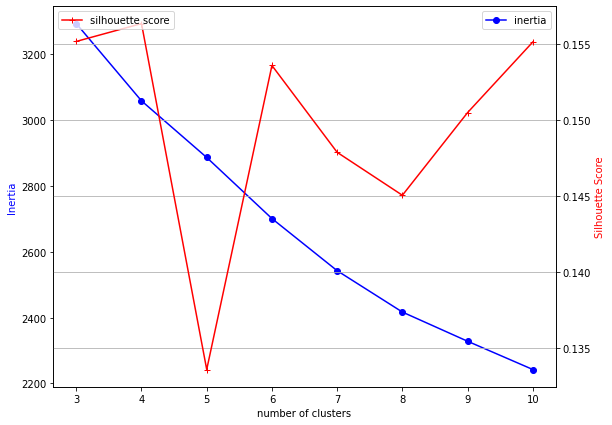

In [ ]:
plot_k_values(scaled_df,range(3,11))

In [ ]:
# Fit kmeans model with 2 clusters and display the silhouette score
kmeans = KMeans(n_clusters = 4)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

0.15970212955862026

In [ ]:
df["cluster"]=kmeans.labels_

In [ ]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).median()
cluster_groups

,cluster,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,0,136.0,2.750,4.860,29.580,0.0,52.0,27.590,8.23,49.0,0.0
1,1,140.0,5.565,4.265,27.730,1.0,56.0,26.085,66.46,48.0,0.0
2,2,128.0,0.100,3.280,16.670,0.0,54.0,22.450,2.49,26.0,0.0
3,3,140.0,4.130,5.455,29.285,1.0,54.0,27.105,6.17,54.0,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

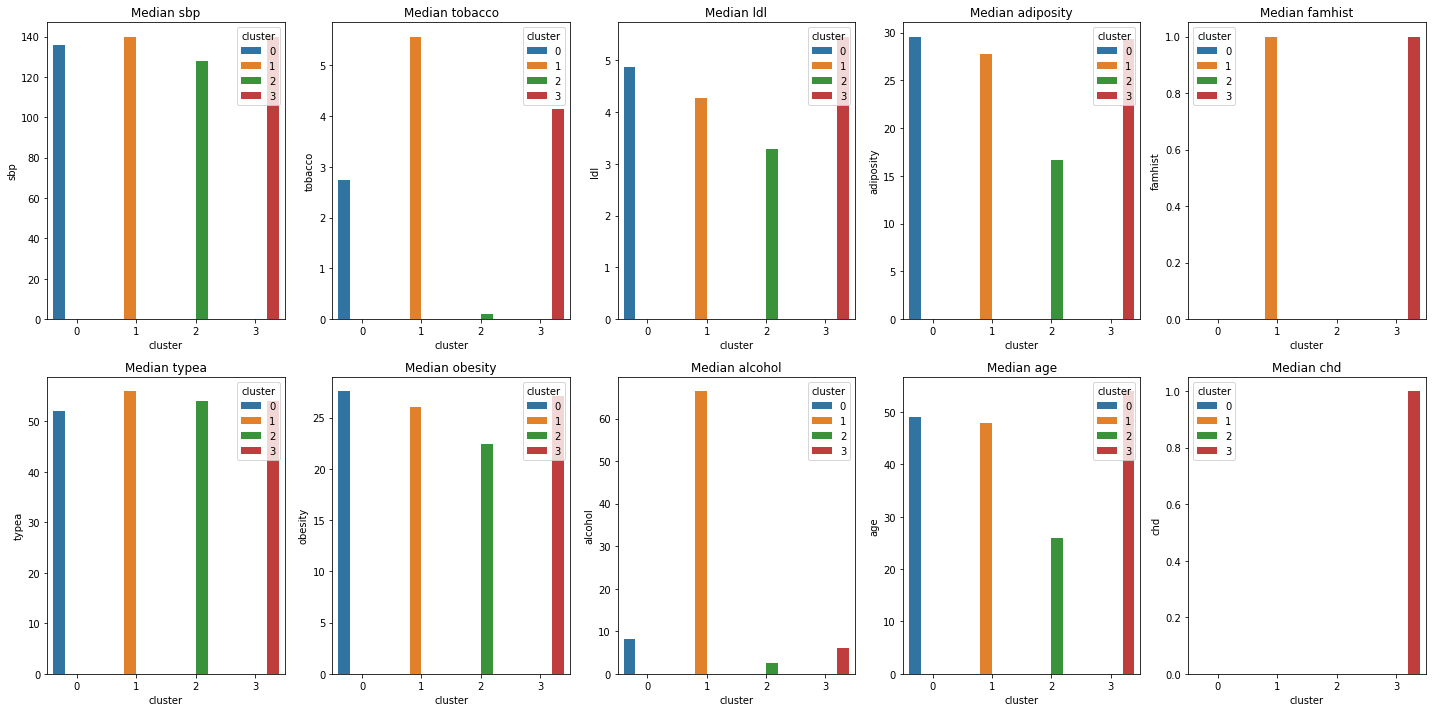

In [ ]:
# Visualize medians 
fig, axes = plt.subplots(2,5, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  #axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  sns.barplot(cluster_groups['cluster'], cluster_groups[col], hue=cluster_groups['cluster'], ax=axes[i])
  #sns.scatterplot(data=df, x=col, y='price', hue='cluster', ax=axes[i])
  axes[i].set_title(f'Median {col}')
plt.tight_layout()